The first 10 values of raw audio data :
[-0.00033569 -0.00042725 -0.0005188  -0.00042725 -0.0005188  -0.00042725
 -0.0005188  -0.00042725 -0.00042725 -0.0005188 ]
The Dimensions of the Audio : 
(176400,)
Sample Rate : 44100
Dimensions of spectrogram:
(128, 345)
<class 'numpy.ndarray'>


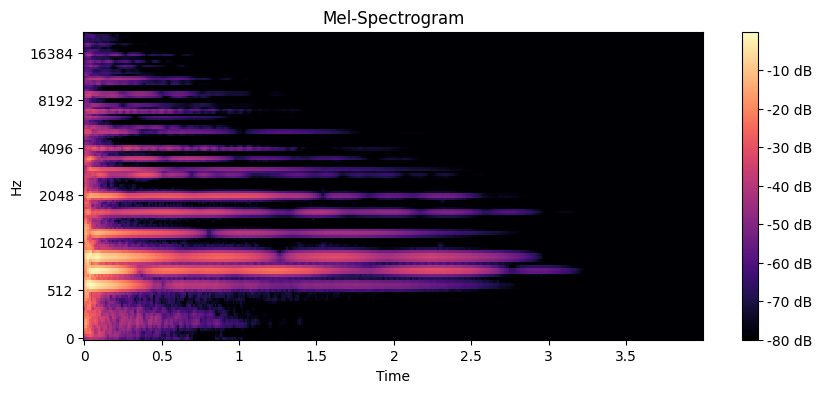

In [1]:
import numpy as np
import matplotlib.pylab as plt
import librosa

audio_file_path = './data/major/A_Major_inversion_13.wav'

raw_data, sample_rate = librosa.load(audio_file_path, sr=None)  # sr=None keeps the original sample rate

print("The first 10 values of raw audio data :")
print(raw_data[:10])

print("The Dimensions of the Audio : ")
print(raw_data.shape)

print("Sample Rate : " + str(sample_rate))

# convert the data into spectrogram and then convert to decibels dB
spectrogram = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=128, fmax=8000)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

print("Dimensions of spectrogram:")
print(spectrogram_db.shape)
print(type(spectrogram_db))

# Plot the spectrogram using librosa's display module
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sample_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.show()



In [2]:
from tensorflow import keras

model = keras.models.load_model('Major_Minor_Model.keras')
model.summary()

2025-02-20 11:14:02.489979: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 171, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 83, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 41, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 39, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 19, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 34048)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     4,358,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,353,221 (50.94 MB)

 Trainable params: 4,451,073 (16.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,902,148 (33.96 MB)

In [6]:
accuracy = model.history["accuracy"]
val_accuracy = model.history["val_accuracy"]
loss = model.history["loss"]
val_loss = model.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

AttributeError: 'Sequential' object has no attribute 'history'